In [ ]:
!pip install scikit learn

In [2]:
# LINEAR REGRESSION - Prediction of weight 

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
#Importing height weight csv
df=pd.read_csv("Height_Weight.csv")
df

,id,gender,weight,height
0,29,F,39,157
1,182,F,43,154
2,130,F,44,157
3,104,F,45,163
4,128,F,45,157
...,...,...,...,...
194,65,M,97,189
195,30,M,101,183
196,54,M,102,185
197,97,M,103,185


In [81]:
# To find the datatypes of each columns in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      199 non-null    int64 
 1   gender  199 non-null    object
 2   weight  199 non-null    int64 
 3   height  199 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.3+ KB


In [82]:
# To know the statistics info of columns 
df.describe()

,id,weight,height
count,199.000000,199.000000,199.000000
mean,100.944724,65.195980,170.587940
std,57.681571,13.008031,8.948848
min,1.000000,39.000000,148.000000
25%,51.500000,55.000000,164.000000
50%,101.000000,63.000000,170.000000
75%,150.500000,73.500000,177.500000
max,200.000000,103.000000,197.000000


In [83]:
# Statistics of cetogorical columns
df.describe(include="object")

,gender
count,199
unique,2
top,F
freq,111


In [84]:
#Dropping "id" column as it is unique identification for each row
df.drop(['id'], axis = 1,inplace=True)
df

,gender,weight,height
0,F,39,157
1,F,43,154
2,F,44,157
3,F,45,163
4,F,45,157
...,...,...,...
194,M,97,189
195,M,101,183
196,M,102,185
197,M,103,185


In [85]:
# Finding sum of missing values in df
df.isnull().sum()

gender    0
weight    0
height    0
dtype: int64

In [86]:
# Frequency matrix of "gender" column
df["gender"].value_counts()

F    111
M     88
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

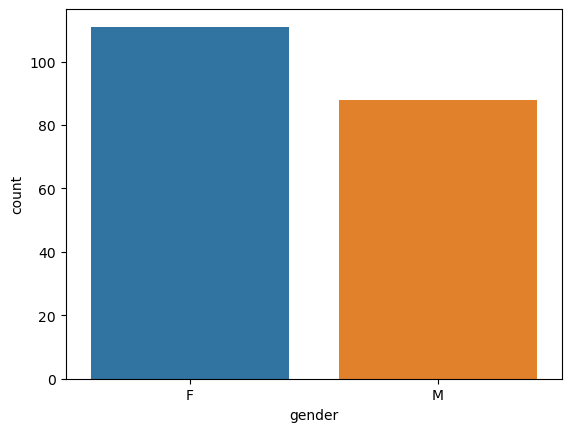

In [87]:
# Bar chat of freqency column (for male and female)
sns.countplot(x="gender",data=df)

<Axes: xlabel='weight', ylabel='height'>

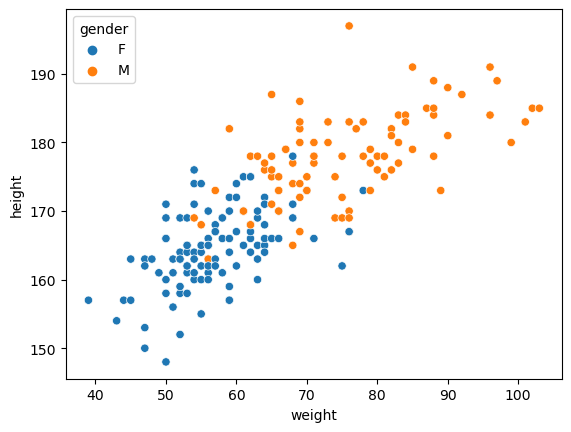

In [88]:
# Lokking for the scatter plot b/w "height" & "weight".
sns.scatterplot(x='weight', y='height', hue="gender", data=df)
# "hue" is a parameter that allows you to color the points on the scatterplot based on a third categorical variable.

In [89]:
# Find the cor-relation between weight and height
df.corr()

C:\Users\pc\AppData\Local\Temp\ipykernel_9824\16905682.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,weight,height
weight,1.000000,0.782438
height,0.782438,1.000000


In [90]:
# Highly positive cor-relation between height and weight

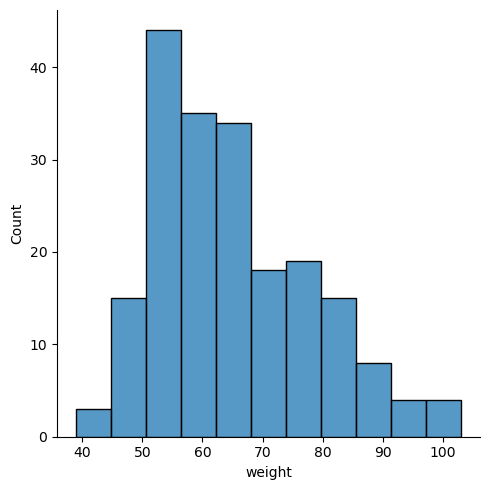

In [91]:
# Plot histogram to see the distribution of weight
sns.displot(df.weight,kind="hist")

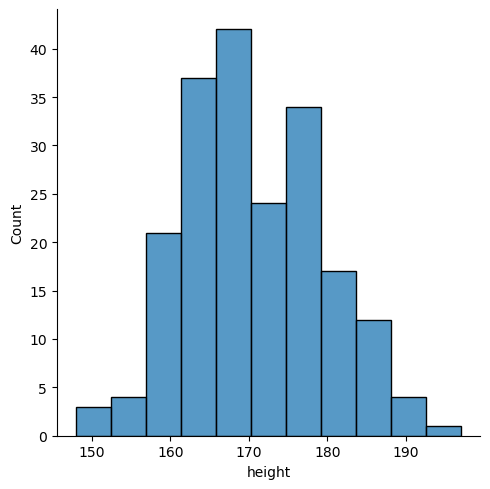

In [92]:
# Plot histogram to see the distribution of height
sns.displot(df["height"],kind="hist")

In [93]:
# Checking skewness in weight column 
df["weight"].skew()

0.7449402052268245

In [94]:
# Checking skewness in height column 
df["height"].skew()

0.2129090698591845

<Axes: >

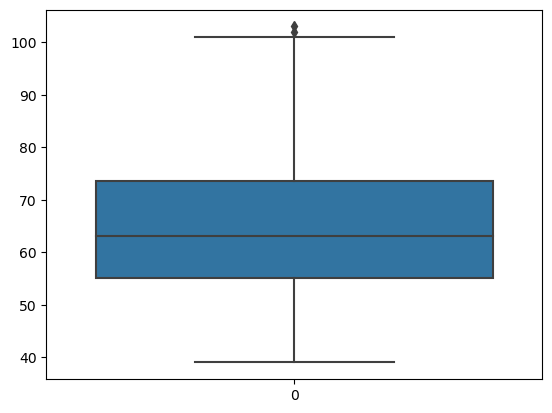

In [95]:
# Plot boxplot to detect the outliers in weight column 
sns.boxplot(df["weight"])

<Axes: >

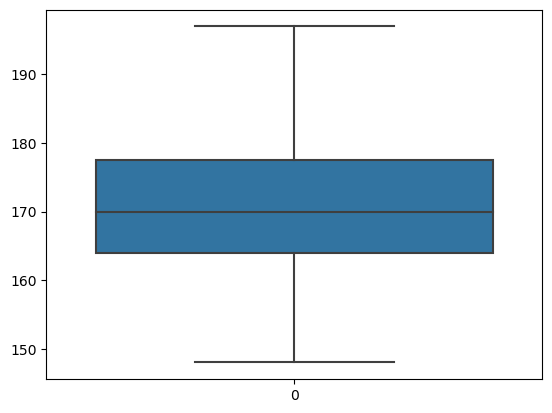

In [96]:
# Plot boxplot to detect the outliers in height column 
sns.boxplot(df["height"])

In [104]:
# Assigning of inpedendent variable "height" as "x"
x=df["height"]# here we take only height only only because gender is cetogorical so we have to 1st convert into numarical
x

0      157
1      154
2      157
3      163
4      157
      ... 
194    189
195    183
196    185
197    185
198    180
Name: height, Length: 199, dtype: int64

In [98]:
# Assigning of inpedendent variable "weight" as "y"
y=df["weight"]
y

0       39
1       43
2       44
3       45
4       45
      ... 
194     97
195    101
196    102
197    103
198     99
Name: weight, Length: 199, dtype: int64

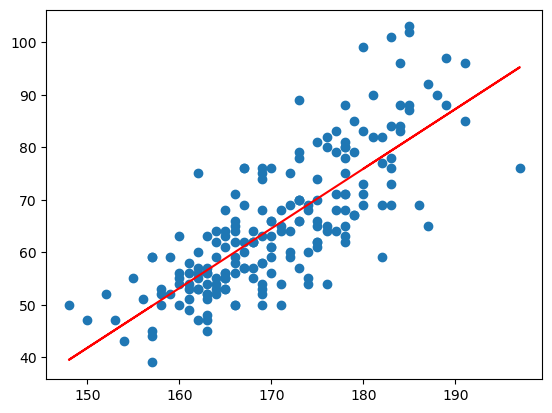

In [99]:
# To plot a liner regression (best fit line) on a scatter plot, using np.ployfit()
import numpy as np
plt.scatter(x,y)
m,b = np.polyfit(x, y, 1) # m= slope , b=intercept
plt.plot(x, m*x + b,'r') # we plot x & equation (m*x+b) , r= red colur

In [100]:
# Creating list of numeric columns
df.select_dtypes(include=[np.number]).columns.tolist()

['weight', 'height']

In [101]:
# Creating df of Numeric columns
df_num = df[['weight','height']]
df_num

,weight,height
0,39,157
1,43,154
2,44,157
3,45,163
4,45,157
...,...,...
194,97,189
195,101,183
196,102,185
197,103,185


In [102]:
# Changing gender (which is cetogorical variable) into numerical variable 
df_dummies = pd.get_dummies(df['gender'])
df_dummies

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
194,0,1
195,0,1
196,0,1
197,0,1


In [103]:
# combined column wise, oppendig og columns
df_combined= pd.concat([df_num,df_dummies], axis=1)
df_combined

,weight,height,F,M
0,39,157,1,0
1,43,154,1,0
2,44,157,1,0
3,45,163,1,0
4,45,157,1,0
...,...,...,...,...
194,97,189,0,1
195,101,183,0,1
196,102,185,0,1
197,103,185,0,1


In [56]:
# Find null valve
df_combined.isnull().sum()

weight    0
height    0
F         0
M         0
dtype: int64

In [149]:
# Putting feature variable to x (ie x-dataset after removing interset rate)
X= df_combined.drop("weight",axis=1)
X

,height,F,M
0,157,1,0
1,154,1,0
2,157,1,0
3,163,1,0
4,157,1,0
...,...,...,...
194,189,0,1
195,183,0,1
196,185,0,1
197,185,0,1


In [150]:
# Putting response variable to y
y=df_combined["weight"]
y

0       39
1       43
2       44
3       45
4       45
      ... 
194     97
195    101
196    102
197    103
198     99
Name: weight, Length: 199, dtype: int64

Splitting the data in training and testing set using sklearn we split 70% of our data into training set an rest in testing set.
Setting random_state will give the same training and testing set everytime on running code

In [151]:
#Split the Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=12)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((139, 3), (139,), (60, 3), (60,))

Performing Linear Regression

In [152]:
from sklearn.linear_model import LinearRegression

In [153]:
# Representing LinearRegression as lm
lm = LinearRegression()
lm

LinearRegression()

In [154]:
# fit the model to the training data
lm.fit(X_train,y_train)

LinearRegression()

In [155]:
# Print the intercept
print(lm.intercept_)

-73.9156066324012


In [156]:
# Print the intercept
print(lm.coef_)

[ 0.82001155 -3.9909753   3.9909753 ]


In [169]:
# Let see the coefficent
coef_df=pd.DataFrame(lm.coef_,X_test.columns,columns=["coefficent"])
coef_df

,coefficent
height,0.820012
F,-3.990975
M,3.990975


<Axes: xlabel='F', ylabel='weight'>

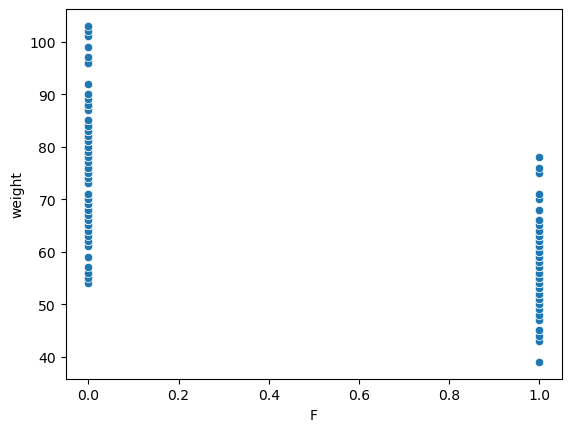

In [171]:
sns.scatterplot(data=df_combined, x='F', y='weight')

In [163]:
# Making prediction with the model
y_pred=lm.predict(X_test)
y_pred

array([80.13748194, 58.21533502, 59.85535812, 76.85743575, 58.21533502,
       55.75530038, 77.67744729, 71.93736646, 54.93528883, 60.67536967,
       54.93528883, 61.49538122, 82.59751658, 43.45512716, 51.65524264,
       67.01729717, 84.23753968, 63.13540431, 75.21741265, 59.03534657,
       54.93528883, 76.0374242 , 57.39532348, 55.75530038, 76.85743575,
       67.83730872, 81.77750503, 56.57531193, 76.0374242 , 76.0374242 ,
       75.21741265, 76.0374242 , 73.57738955, 57.39532348, 69.47733181,
       48.37519645, 55.75530038, 59.85535812, 61.49538122, 54.93528883,
       53.29526574, 68.65732027, 71.93736646, 58.21533502, 55.75530038,
       56.57531193, 52.47525419, 45.09515026, 66.4154505 , 77.67744729,
       91.61764361, 67.83730872, 85.05755122, 57.39532348, 62.31539276,
       60.67536967, 85.05755122, 58.21533502, 47.5551849 , 86.69757432])

In [164]:
# Model performance metrix,Coefficent of determination (R Square)
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
print(mse)
r_square=r2_score(y_test,y_pred)
print(r_square)

64.25479333557398
0.6614382225616862


In [167]:
from math import sqrt
rmse=sqrt(mse)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_square)

Mean_Squared_Error : 64.25479333557398
Root_Mean_Squared_Error : 8.015908765422294
r_square_value : 0.6614382225616862


In [168]:
df1=pd.DataFrame({"Actual":y_test,"predicted":y_pred})
df1

,Actual,predicted
148,73,80.137482
11,50,58.215335
92,62,59.855358
124,67,76.857436
93,62,58.215335
21,52,55.755300
198,99,77.677447
62,57,71.937366
7,47,54.935289
29,53,60.675370
